# Install and Import Modules

In [2]:
# Installing the required modules
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [3]:
 # Installing the CPU and CUDA
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 23.9 MB/s eta 0:00:00


In [4]:
# Importing the different libraries
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Defining the path of images

In [ ]:
# Optional by defining the path of each images
# img0_path = './images/text0.jpg'
# img1_path = './images/text1.jpg'
# img2_path = './images/text2.jpg'
# img3_path = './images/text3.jpg'
# img4_path = './images/text4.jpg'
# img5_path = './images/text5.jpg'
# img6_path = './images/text6.jpg'
# img7_path = './images/text7.jpg'
# img8_path = './images/text8.jpg'
# img9_path = './images/text9.jpg'

In [5]:
# Extracting the path of images one by one in the form of list
# img_path = "./images/"
# create_path = lambda f : os.path.join(img_path, f)
# test_image_files = os.listdir(img_path)

# for f in test_image_files:
#     print(f)
img_path = "1.png"
create_path = lambda f : os.path.join(img_path, f)


In [6]:
# loading the path of image by passing the position of the image
# img = test_image_files[3]
# path = create_path(img)
img = img_path

# Recognizing the text from images

In [7]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''

    reader = easyocr.Reader(['en'])        # For English - 'en'  And,  For Hindi - 'hi'
    return reader.readtext(img_path)

In [8]:
#result = recognize_text(path)
result = recognize_text(img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [9]:
result

[([[91, 189], [201, 189], [201, 225], [91, 225]], 'GSTTN', 0.6020573059805031),
 ([[217, 189], [501, 189], [501, 225], [217, 225]],
  '33ABTFS619SEIZO',
  0.6694467322789208),
 ([[676, 178], [939, 178], [939, 220], [676, 220]],
  'DELIVERY NOTE',
  0.9992921091285887),
 ([[1223, 185], [1299, 185], [1299, 227], [1223, 227]],
  'Cell',
  0.9992189407348633),
 ([[1317, 183], [1525, 183], [1525, 227], [1317, 227]],
  '94437 17184',
  0.9819883220645462),
 ([[231, 246], [1387, 246], [1387, 332], [231, 332]],
  'SHRI SAKTHIDEVI TEXTILES',
  0.9511360105784142),
 ([[320, 338], [1130, 338], [1130, 391], [320, 391]],
  '1-A3, Tirupur Main Road; Rayarpalayam, Palladam',
  0.8219747929302431),
 ([[1153, 339], [1293, 339], [1293, 381], [1153, 381]],
  '641 664.',
  0.3918879639287222),
 ([[95, 429], [145, 429], [145, 467], [95, 467]], 'No.', 0.6460009450778752),
 ([[210, 430], [310, 430], [310, 484], [210, 484]],
  '488',
  0.23633825145675363),
 ([[1221, 429], [1293, 429], [1293, 465], [1221, 465

# Loading the image

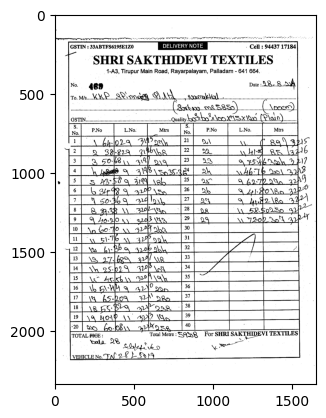

In [10]:
# Showing the current(Selected) image
img_1 = cv2.imread(img)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
# img_1 = cv2.imread(path)
# img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
# plt.imshow(img_1)

# Process of Extraction

In [11]:
def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''

    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # Recognise text
    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)

            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./Output/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: GSTTN (Probability: 0.60)
Detected text: 33ABTFS619SEIZO (Probability: 0.67)
Detected text: DELIVERY NOTE (Probability: 1.00)
Detected text: Cell (Probability: 1.00)
Detected text: 94437 17184 (Probability: 0.98)
Detected text: SHRI SAKTHIDEVI TEXTILES (Probability: 0.95)
Detected text: 1-A3, Tirupur Main Road; Rayarpalayam, Palladam (Probability: 0.82)
Detected text: 641 664. (Probability: 0.39)
Detected text: No. (Probability: 0.65)
Detected text: 488 (Probability: 0.24)
Detected text: Date (Probability: 1.00)
Detected text: To. Ws___Z (Probability: 0.43)
Detected text: Axmkkol (Probability: 0.64)
Detected text: GSTIN. (Probability: 0.52)
Detected text: Quality (Probability: 0.74)
Detected text: S (Probability: 0.98)
Detected text: S_ (Probability: 0.82)
Detected text: PNo (Probability: 1.00)
Detected text: LNo:' (Probability: 0.97)
Detected text: Mtrs (Probability: 1.00)
Detected text: PNo (Probability: 0.99)
Detected text: LNo: (Probability: 0.61)
Detected text: Mtrs

FileNotFoundError: [Errno 2] No such file or directory: '/content/Output/Text3_Output_overlay.jpg'

<Figure size 640x480 with 0 Axes>

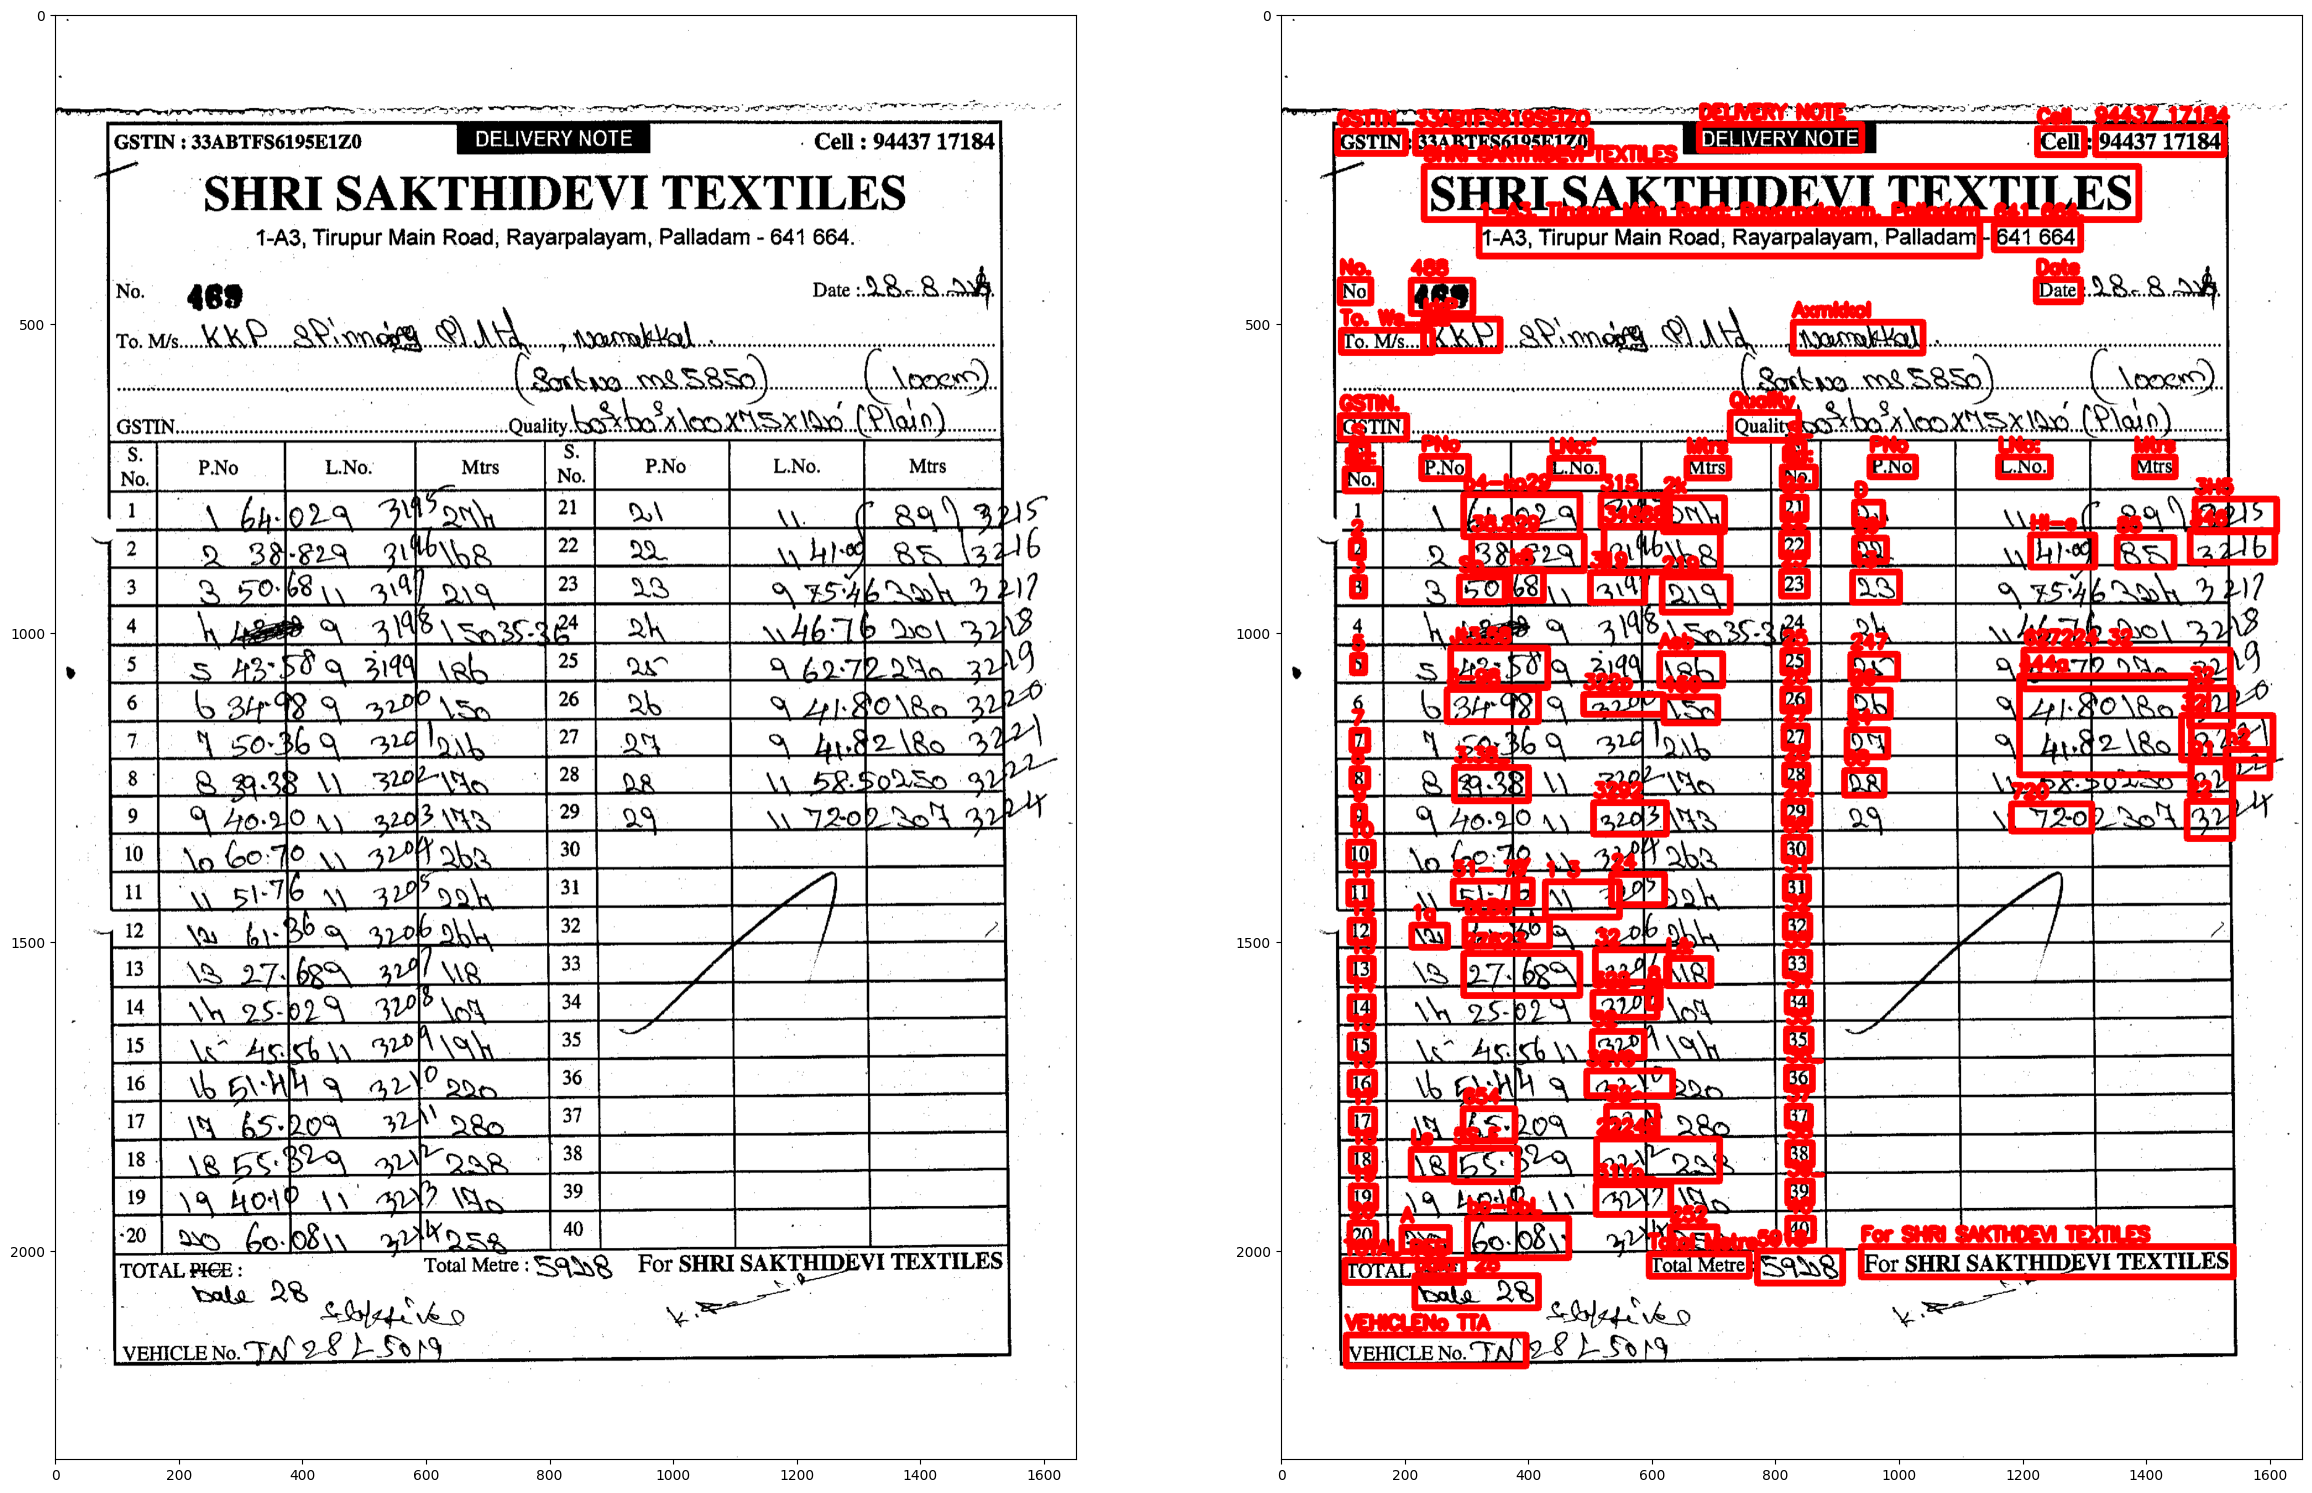

In [12]:
overlay_ocr_text(img, 'Text3_Output')

# Final Output(text)

In [13]:
# Extracting text from the image
def ocr_text(img_path):

    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay text
    for(bbox, text, prob) in result:
        if prob:
            print(f'{text}')


In [14]:
# Extracted Text
ocr_text(img_path)

GSTTN
33ABTFS619SEIZO
DELIVERY NOTE
Cell
94437 17184
SHRI SAKTHIDEVI TEXTILES
1-A3, Tirupur Main Road; Rayarpalayam, Palladam
641 664.
No.
488
Date
48..8.A/
To. Ws___Z
sPinnad
Axmkkol
Sortax_kng,5.850_
En)
GSTIN.
3
Quality
LglaxkoxhsxIAd_(Plala'
S
S_
PNo
LNo:'
Mtrs
PNo
LNo:
Mtrs
No:
No:
b4-ko29
2k
21
D
2
38.829
34668
22
29
Hl-e
85
3
k8
219
23
13
I544sk 22v7
15a.82.8224
sh
4b.7+ D0L 22
5
Jt3.58
Aeb
25
247
627224 32
150
26
26
32
7
1so3b
34L
27
24
444a
32|
8
3.38_
3221d6
28
08
5R 5o2s0
91
9
4o204L
4ma
29.
720
22
10
6edoLL 32kzba
30
11
6
1 3
D2}
31
12
1q
322k.944
32
13
27623
L&
33
14
1h25p2"
8
34
15
LssduA
35
16
299
36_
17
654
32^
37
18
Le
22249
38
19
4o- c
39_
20
A
bo-bbL
252
40
TOTAL PEE
Total Metre
5918
For SHRI SAKTHDEVI TEXTILES
bala  28
~OLV_o
VEHICLENo TTA
2&)SOAI
kkP
315
3H5
346
319
So
3148
31991
3-98
322p
h2
3292
24
51- 7/
bLBb
32
322
32
5LHh
32Y0
5S F
31Yp_
22YYc
